**Inclass material for Week 3: Data Wrangling and Visualization**

This notebook was made based on main materials `3_Data_Wrangling_and_Visualization.ipynb`

Version: Qoppa - December 2021

---
**START OF DAY 1**

# Data Wrangling and Visualization

Berikut adalah method yang telah kita pelajari di dua course sebelumnya:

**Data Inspection** (Course: Python for Data Analysts)
- `.head()` and `.tail()`
- `.describe()`
- `.shape` and `.size`
- `.axes`
- `.dtypes`
- Subsetting using `.loc`, `.iloc` and conditionals

**Diagnostic and Exploratory** (Course: Exploratory Data Analysis)
- Tables
- Cross-Tables and Aggregates
- Using `aggfunc` for aggregate functions
- Pivot Tables
- Working with DateTime
- Working with Categorical Data
- Duplicates and Missing Value Treatment

---

**Training Objectives for Course Data Wrangling and Visualization**

- Working with MultiIndex DataFrames
- Stacking and Unstacking
- Reshaping your DataFrame with Melt
- Using Group By Effectively
- Visual Data Exploratory

# Reproducible Environment

Bayangkan Anda sedang mengerjakan suatu proyek yang membutuhkan kolaborasi dengan tim. Proyek tersebut diinisiasi oleh Anda, code dan packages pada komputer Anda berjalan dengan baik. Kemudian Anda ingin membagikan proyek tersebut kepada tim Anda. Apakah tim Anda harus melakukan instalasi package satu per satu secara manual? Tentu tidak, di sini Anda membuat suatu **environment** yang dapat di-reproducible (digandakan) dengan membuat suatu file `requirements.txt`.

Lihat pada folder `/assets`, Anda akan menemukan file `requirements.txt` yang isinya seperti ini:
```
appnope==0.1.0
backcall==0.2.0
certifi==2020.6.20
chardet==3.0.4
cycler==0.10.0
decorator==4.4.2
...
```

File ini berisi daftar **packages beserta versinya** yang ada di environment dalam menjalankan proyek tertentu. File ini membantu tim Anda untuk mengembangkan suatu aplikasi dalam satu versi yang sama, sehingga mencegah terjadinya perubahan fungsi-fungsi yang tidak terduga.

## Exporting Requirements

Misal Anda ingin membagikan daftar packages suatu environment kepada tim Anda, maka lakukanlah langkah berikut:

1. Aktifkan environment
```
conda activate <ENV_NAME>
```

2. Navigasikan path ke folder tempat di mana file `requirements.txt` ingin disimpan
```
cd <PATH_TO_REQUIREMENTS_FOLDER>
```

3. Export environment: membuat daftar packages beserta versinya.
```
pip list --format=freeze > requirements.txt
```

💡 Anda dapat menyimpan file dengan nama lain, namun sebagai **konvensi** biasa digunakan penamaan `requirements.txt`

## Importing Requirements

Misal Anda yang meneruskan proyek dan telah menerima file `txt` dari tim Anda, maka lakukanlah langkah berikut:

1. Siapkan environment yang kosong
```
conda create -n <ENV_NAME> python=<PYTHON_VERSION>
```

2. Aktifkan environment tersebut
```
conda activate <ENV_NAME>
```

3. Navigasikan path ke folder di mana file `requirements.txt` berada
```
cd <PATH_TO_REQUIREMENTS>
```

4. Instalasi packages dari file tersebut
```
pip install -r requirements.txt
```

⚠️ Jangan lupa instalasi kernel di dalam environment tersebut apabila ingin dapat diakses menggunakan jupyter notebook:
```
pip install ipykernel
python -m ipykernel install --user --name=<ENV_NAME>
```

# Data Wrangling and Reshaping

## Load Data

### `pandas_datareader`

Kita akan menggunakan library `yfinance` untuk mengakses data saham yang tersedia pada [Yahoo! Finance](https://finance.yahoo.com/). Penarikan data menggunakan `yfinance` membutuhkan koneksi internet.

Dokumentasi: https://pypi.org/project/yfinance/

In [794]:
import pandas as pd
import yfinance as data
pd.set_option('display.float_format', lambda x: '%.6f' % x)

In [795]:
symbol = ['AAPL', 'FB', 'GOOGL'] # kode saham yang ingin kita ambil 
start_date = '2018-01-01' # waktu mulai
end_date = '2022-01-01' # waktu berenti
stock = data.download(symbol, start_date, end_date)
stock.columns.names = ['Attributes', 'Symbols']
stock.head()

[*********************100%***********************]  3 of 3 completed


Attributes Adj Close                            Close                         \
Symbols         AAPL         FB       GOOGL      AAPL         FB       GOOGL   
Date                                                                           
2018-01-02 41.188168 181.419998 1073.209961 43.064999 181.419998 1073.209961   
2018-01-03 41.180988 184.669998 1091.520020 43.057499 184.669998 1091.520020   
2018-01-04 41.372276 184.330002 1095.760010 43.257500 184.330002 1095.760010   
2018-01-05 41.843315 186.850006 1110.290039 43.750000 186.850006 1110.290039   
2018-01-08 41.687901 188.279999 1114.209961 43.587502 188.279999 1114.209961   

Attributes      High                              Low                         \
Symbols         AAPL         FB       GOOGL      AAPL         FB       GOOGL   
Date                                                                           
2018-01-02 43.075001 181.580002 1075.979980 42.314999 177.550003 1053.020020   
2018-01-03 43.637501 184.779999 1096.099976 42.990002 181.330002 1073.430054   
2018-01-04 43.367500 186.210007 1104.079956 43.020000 184.100006 1094.260010   
2018-01-05 43.842499 186.899994 1113.579956 43.262501 184.929993 1101.800049   
2018-01-08 43.902500 188.899994 1119.160034 43.482498 186.330002 1110.000000   

Attributes      Open                            Volume                     
Symbols         AAPL         FB       GOOGL       AAPL        FB    GOOGL  
Date                                                                       
2018-01-02 42.540001 177.679993 1053.020020  102223600  18151900  1588300  
2018-01-03 43.132500 181.880005 1073.930054  118071600  16886600  1565900  
2018-01-04 43.134998 184.899994 1097.089966   89738400  13880900  1302600  
2018-01-05 43.360001 185.589996 1103.449951   94640000  13574500  1512500  
2018-01-08 43.587502 187.199997 1111.000000   82271200  17994700  1232200

Source:
- `AAPL`: Apple Inc.
- `FB`: Facebook, Inc.
- `GOOGL`: Alphabet Inc. (Google)

Data description:
- `Date` - specifies trading date in `yyyy-mm-dd` format
- `High` - maximum price of the day
- `Low` - minimum price of the day
- `Open` - opening price at the start of the day
- `Close` - closing price at the end of the day
- `Adj Close` - adjusted closing price for both dividends and splits
- `Volume` - the number of shares that changed hands during a given day

The trading hours of [different stock markets differ](https://www.maybank-ke.com.sg/markets/markets-listing/trading-hours/) (the NYSE for example open its market floor from 9.30am to 4pm five days a week).

contoh saham indonesia

In [796]:
symbol = ['BBCA.JK','BBRI.JK','ADRO.JK'] # kode saham yang ingin kita ambil 
start_date = '2018-01-01' # waktu mulai
end_date = '2022-01-01' # waktu berenti
stock = data.download(symbol, start_date, end_date)
stock.columns.names = ['Attributes', 'Symbols']
stock.head()

[*********************100%***********************]  3 of 3 completed


Attributes   Adj Close                               Close              \
Symbols        ADRO.JK     BBCA.JK     BBRI.JK     ADRO.JK     BBCA.JK   
Date                                                                     
2018-01-01 1453.167480 4122.658203 3243.274170 1860.000000 4380.000000   
2018-01-02 1468.792969 4122.658203 3234.364258 1880.000000 4380.000000   
2018-01-03 1429.729248 4122.658203 3216.543945 1830.000000 4380.000000   
2018-01-04 1496.137451 4183.839355 3163.083740 1915.000000 4445.000000   
2018-01-05 1554.733154 4188.546387 3198.723633 1990.000000 4450.000000   

Attributes                    High                                 Low  \
Symbols        BBRI.JK     ADRO.JK     BBCA.JK     BBRI.JK     ADRO.JK   
Date                                                                     
2018-01-01 3640.000000 1860.000000 4380.000000 3640.000000 1860.000000   
2018-01-02 3630.000000 1900.000000 4505.000000 3720.000000 1865.000000   
2018-01-03 3610.000000 1890.000000 4390.000000 3630.000000 1810.000000   
2018-01-04 3550.000000 1935.000000 4445.000000 3610.000000 1850.000000   
2018-01-05 3590.000000 1990.000000 4480.000000 3590.000000 1935.000000   

Attributes                                Open                          \
Symbols        BBCA.JK     BBRI.JK     ADRO.JK     BBCA.JK     BBRI.JK   
Date                                                                     
2018-01-01 4380.000000 3640.000000 1860.000000 4380.000000 3640.000000   
2018-01-02 4365.000000 3610.000000 1865.000000 4380.000000 3690.000000   
2018-01-03 4265.000000 3560.000000 1890.000000 4385.000000 3630.000000   
2018-01-04 4380.000000 3460.000000 1860.000000 4380.000000 3610.000000   
2018-01-05 4435.000000 3520.000000 1935.000000 4460.000000 3550.000000   

Attributes           Volume                                   
Symbols             ADRO.JK         BBCA.JK          BBRI.JK  
Date                                                          
2018-01-01         0.000000        0.000000         0.000000  
2018-01-02  26045000.000000 82303500.000000  91127100.000000  
2018-01-03  35595000.000000 68214000.000000  70148700.000000  
2018-01-04  81191500.000000 76567000.000000 156406300.000000  
2018-01-05 112355500.000000 65268000.000000  87095600.000000

contoh untuk mengambil data kriptocurrency

In [797]:
# symbol = ['MATIC-USD', 'SOL-USD', 'BTC-USD'] # kode saham yang ingin kita ambil 
# start_date = '2018-01-01' # waktu mulai
# end_date = '2022-01-01' # waktu berenti
# stock = data.download(symbol, start_date, end_date)
# stock.columns.names = ['Attributes', 'Symbols']
# stock.head()

contoh mengambil kurs asing harga rupiah ke usd, contoh juga untuk mengambil 1 data saja 

In [798]:
# symbol = ['IDR=X'] # kode saham yang ingin kita ambil 
# start_date = '2018-01-01' # waktu mulai
# end_date = '2022-01-01' # waktu berenti
# stock = data.download(symbol, start_date, end_date)
# #stock.columns.names = ['Attributes', 'Symbols'] # kalau 1 tidak perlu ini
# stock.head()

### File Pickle

Pickling/Serializing: **menyimpan** suatu objek Python ke sebuah file binary (byte stream).
- Gunakan method `.to_pickle()`
- Contohnya objek DataFrame `stock` disimpan sebagai file `stock_2`
- Kemudian silahkan cek file pickle pada folder di mana file `.ipynb` ini berada

In [799]:
stock.to_pickle('../data_cache/stock_2')

Unpickling/De-serializing: **membaca** suatu objek Python dari sebuah file binary (byte stream). 
- Gunakan method `pd.read_pickle()`
- Untuk selanjutnya, mari kita gunakan file pickle pada `data_cache/stock` yang untuk tanggal 2 Januari 2018 sampai 24 Mei 2021.

In [800]:
# import pandas as pd
stock = pd.read_pickle("../data_cache/stock_2")
stock.head()

Attributes   Adj Close                               Close              \
Symbols        ADRO.JK     BBCA.JK     BBRI.JK     ADRO.JK     BBCA.JK   
Date                                                                     
2018-01-01 1453.167480 4122.658203 3243.274170 1860.000000 4380.000000   
2018-01-02 1468.792969 4122.658203 3234.364258 1880.000000 4380.000000   
2018-01-03 1429.729248 4122.658203 3216.543945 1830.000000 4380.000000   
2018-01-04 1496.137451 4183.839355 3163.083740 1915.000000 4445.000000   
2018-01-05 1554.733154 4188.546387 3198.723633 1990.000000 4450.000000   

Attributes                    High                                 Low  \
Symbols        BBRI.JK     ADRO.JK     BBCA.JK     BBRI.JK     ADRO.JK   
Date                                                                     
2018-01-01 3640.000000 1860.000000 4380.000000 3640.000000 1860.000000   
2018-01-02 3630.000000 1900.000000 4505.000000 3720.000000 1865.000000   
2018-01-03 3610.000000 1890.000000 4390.000000 3630.000000 1810.000000   
2018-01-04 3550.000000 1935.000000 4445.000000 3610.000000 1850.000000   
2018-01-05 3590.000000 1990.000000 4480.000000 3590.000000 1935.000000   

Attributes                                Open                          \
Symbols        BBCA.JK     BBRI.JK     ADRO.JK     BBCA.JK     BBRI.JK   
Date                                                                     
2018-01-01 4380.000000 3640.000000 1860.000000 4380.000000 3640.000000   
2018-01-02 4365.000000 3610.000000 1865.000000 4380.000000 3690.000000   
2018-01-03 4265.000000 3560.000000 1890.000000 4385.000000 3630.000000   
2018-01-04 4380.000000 3460.000000 1860.000000 4380.000000 3610.000000   
2018-01-05 4435.000000 3520.000000 1935.000000 4460.000000 3550.000000   

Attributes           Volume                                   
Symbols             ADRO.JK         BBCA.JK          BBRI.JK  
Date                                                          
2018-01-01         0.000000        0.000000         0.000000  
2018-01-02  26045000.000000 82303500.000000  91127100.000000  
2018-01-03  35595000.000000 68214000.000000  70148700.000000  
2018-01-04  81191500.000000 76567000.000000 156406300.000000  
2018-01-05 112355500.000000 65268000.000000  87095600.000000

⚠️ Jangan pernah unpickling file yang berasal dari sumber yang tidak tepercaya, karena bisa saja file tersebut berisi script berupa virus yang dapat membahayakan sistem Anda.

💡 Dengan menggunakan file pickle kita **"mengawetkan"** struktur dari object Python, untuk DataFrame dapat terjaga tipe data dan indexnya.

In [801]:
# membuat dummy data lalu konversi tipe data
dummy = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6, 7],
    'gender': ['Male', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male'],
    'blood_type': ['O', 'A', 'B', 'AB', 'B', 'B', 'O'],
    'join_date': ['28 Jun 2021', '29 Jun 2021', '30 Jun 2021', '1 Jul 2021', '2 Jul 2021', '3 Jul 2021', '4 Jul 2021']
})
dummy[['gender', 'blood_type']] = dummy[['gender', 'blood_type']].astype('category')
dummy['join_date'] = dummy['join_date'].astype('datetime64')
dummy.dtypes

id                     int64
gender              category
blood_type          category
join_date     datetime64[ns]
dtype: object

In [802]:
dummy.head()

,id,gender,blood_type,join_date
0,1,Male,O,2021-06-28
1,2,Female,A,2021-06-29
2,3,Male,B,2021-06-30
3,4,Female,AB,2021-07-01
4,5,Female,B,2021-07-02


In [803]:
# simpan object dummy ke dalam folder data_cache nama filenya "dummy"
dummy.to_pickle("../data_cache/dummy")

In [804]:
# baca dari pickle dan cek tipe data
test_dummy = pd.read_pickle('../data_cache/dummy')

test_dummy.dtypes

id                     int64
gender              category
blood_type          category
join_date     datetime64[ns]
dtype: object

Bandingkan dengan menyimpannya ke file text biasa, yaitu csv misalnya:

In [805]:
# simpan ke file csv
dummy.to_csv('../data_cache/dummy.csv', index=False)

# baca dari csv dan cek tipe data
pd.read_csv('../data_cache/dummy.csv').dtypes

id             int64
gender        object
blood_type    object
join_date     object
dtype: object

In [806]:
stock.to_csv("../data_cache/stock.csv")

test_stock = pd.read_csv('../data_cache/stock.csv')

test_stock.head()

,Attributes,Adj Close,Adj Close.1,Adj Close.2,Close,Close.1,Close.2,High,High.1,High.2,Low,Low.1,Low.2,Open,Open.1,Open.2,Volume,Volume.1,Volume.2
0,Symbols,ADRO.JK,BBCA.JK,BBRI.JK,ADRO.JK,BBCA.JK,BBRI.JK,ADRO.JK,BBCA.JK,BBRI.JK,ADRO.JK,BBCA.JK,BBRI.JK,ADRO.JK,BBCA.JK,BBRI.JK,ADRO.JK,BBCA.JK,BBRI.JK
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,1453.16748046875,4122.658203125,3243.274169921875,1860.0,4380.0,3640.0,1860.0,4380.0,3640.0,1860.0,4380.0,3640.0,1860.0,4380.0,3640.0,0.0,0.0,0.0
3,2018-01-02,1468.79296875,4122.658203125,3234.3642578125,1880.0,4380.0,3630.0,1900.0,4505.0,3720.0,1865.0,4365.0,3610.0,1865.0,4380.0,3690.0,26045000.0,82303500.0,91127100.0
4,2018-01-03,1429.729248046875,4122.658203125,3216.5439453125,1830.0,4380.0,3610.0,1890.0,4390.0,3630.0,1810.0,4265.0,3560.0,1890.0,4385.0,3630.0,35595000.0,68214000.0,70148700.0


In [807]:
stock.head()

Attributes   Adj Close                               Close              \
Symbols        ADRO.JK     BBCA.JK     BBRI.JK     ADRO.JK     BBCA.JK   
Date                                                                     
2018-01-01 1453.167480 4122.658203 3243.274170 1860.000000 4380.000000   
2018-01-02 1468.792969 4122.658203 3234.364258 1880.000000 4380.000000   
2018-01-03 1429.729248 4122.658203 3216.543945 1830.000000 4380.000000   
2018-01-04 1496.137451 4183.839355 3163.083740 1915.000000 4445.000000   
2018-01-05 1554.733154 4188.546387 3198.723633 1990.000000 4450.000000   

Attributes                    High                                 Low  \
Symbols        BBRI.JK     ADRO.JK     BBCA.JK     BBRI.JK     ADRO.JK   
Date                                                                     
2018-01-01 3640.000000 1860.000000 4380.000000 3640.000000 1860.000000   
2018-01-02 3630.000000 1900.000000 4505.000000 3720.000000 1865.000000   
2018-01-03 3610.000000 1890.000000 4390.000000 3630.000000 1810.000000   
2018-01-04 3550.000000 1935.000000 4445.000000 3610.000000 1850.000000   
2018-01-05 3590.000000 1990.000000 4480.000000 3590.000000 1935.000000   

Attributes                                Open                          \
Symbols        BBCA.JK     BBRI.JK     ADRO.JK     BBCA.JK     BBRI.JK   
Date                                                                     
2018-01-01 4380.000000 3640.000000 1860.000000 4380.000000 3640.000000   
2018-01-02 4365.000000 3610.000000 1865.000000 4380.000000 3690.000000   
2018-01-03 4265.000000 3560.000000 1890.000000 4385.000000 3630.000000   
2018-01-04 4380.000000 3460.000000 1860.000000 4380.000000 3610.000000   
2018-01-05 4435.000000 3520.000000 1935.000000 4460.000000 3550.000000   

Attributes           Volume                                   
Symbols             ADRO.JK         BBCA.JK          BBRI.JK  
Date                                                          
2018-01-01         0.000000        0.000000         0.000000  
2018-01-02  26045000.000000 82303500.000000  91127100.000000  
2018-01-03  35595000.000000 68214000.000000  70148700.000000  
2018-01-04  81191500.000000 76567000.000000 156406300.000000  
2018-01-05 112355500.000000 65268000.000000  87095600.000000

Catatan tambahan:

- File pickle cenderung lebih kecil file sizenya dibandingkan file csv (apabila data sudah cukup besar)
- File pickle hanya dapat di-load menggunakan bahasa Python dengan versi yang sama (saat ini kita menggunakan python 3.8)

## Slicing Multi-Index DataFrame
Perhatikan bahwa `stock` adalah Multi-Index DataFrame, dimana level dari column-nya terdiri dari: `Attributes` dan `Symbols`:

In [808]:
dummy.columns

Index(['id', 'gender', 'blood_type', 'join_date'], dtype='object')

In [809]:
stock.columns

MultiIndex([('Adj Close', 'ADRO.JK'),
            ('Adj Close', 'BBCA.JK'),
            ('Adj Close', 'BBRI.JK'),
            (    'Close', 'ADRO.JK'),
            (    'Close', 'BBCA.JK'),
            (    'Close', 'BBRI.JK'),
            (     'High', 'ADRO.JK'),
            (     'High', 'BBCA.JK'),
            (     'High', 'BBRI.JK'),
            (      'Low', 'ADRO.JK'),
            (      'Low', 'BBCA.JK'),
            (      'Low', 'BBRI.JK'),
            (     'Open', 'ADRO.JK'),
            (     'Open', 'BBCA.JK'),
            (     'Open', 'BBRI.JK'),
            (   'Volume', 'ADRO.JK'),
            (   'Volume', 'BBCA.JK'),
            (   'Volume', 'BBRI.JK')],
           names=['Attributes', 'Symbols'])

Ketika kita subset menggunakan `[]`, maka kita hanya bisa mengakses kolom dengan level teratas, yaitu untuk `Attributes`. 

- ❓ Melakukan subset pada kolom `High` akan menghasilkan DataFrame single index dengan `Symbols` sebagai levelnya.

In [810]:
stock['High']

Symbols,ADRO.JK,BBCA.JK,BBRI.JK
Date,,,
2018-01-01,1860.000000,4380.000000,3640.000000
2018-01-02,1900.000000,4505.000000,3720.000000
2018-01-03,1890.000000,4390.000000,3630.000000
2018-01-04,1935.000000,4445.000000,3610.000000
2018-01-05,1990.000000,4480.000000,3590.000000
...,...,...,...
2021-12-23,2180.000000,7350.000000,4110.000000
2021-12-24,2240.000000,7350.000000,4120.000000
2021-12-27,2260.000000,7350.000000,4110.000000


❗️**Masalah:** Bagaimana caranya apabila kita ingin mengambil semua nilai `Attributes` untuk saham `GOOGL` saja?

In [811]:
# stock['BBCA.JK']
# KeyError: 'BBCA.JK'

**Solusi:** Kita harus menggunakan method `.xs()` (cross-section) untuk mengambil kolom (`axis=1`) pada level dalam

- `key`: kolom yang kita ingin ambil
- `level`: kolom tersebut ada di level apa?
- `axis=1`: merujuk pada kolom

In [812]:
stock.xs(key = 'BBCA.JK' , level = 1 , axis = 1)

#alternatif 
#stock.xs(key = 'BBCA.JK' , level = 'Symbols' , axis = 1)

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2018-01-01,4122.658203,4380.000000,4380.000000,4380.000000,4380.000000,0.000000
2018-01-02,4122.658203,4380.000000,4505.000000,4365.000000,4380.000000,82303500.000000
2018-01-03,4122.658203,4380.000000,4390.000000,4265.000000,4385.000000,68214000.000000
2018-01-04,4183.839355,4445.000000,4445.000000,4380.000000,4380.000000,76567000.000000
2018-01-05,4188.546387,4450.000000,4480.000000,4435.000000,4460.000000,65268000.000000
...,...,...,...,...,...,...
2021-12-23,7300.000000,7300.000000,7350.000000,7300.000000,7325.000000,37136400.000000
2021-12-24,7300.000000,7300.000000,7350.000000,7300.000000,7300.000000,30802100.000000
2021-12-27,7350.000000,7350.000000,7350.000000,7300.000000,7300.000000,20722100.000000


Jika saya ingin mengambil BBRI?

In [813]:
#jawaban Ibu Atika
stock.xs(key = 'BBRI.JK' , level = 1 , axis = 1)

# Jqwaban Bapak Tisna
stock.xs(key='BBRI.JK', level='Symbols', axis=1)


Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2018-01-01,3243.274170,3640.000000,3640.000000,3640.000000,3640.000000,0.000000
2018-01-02,3234.364258,3630.000000,3720.000000,3610.000000,3690.000000,91127100.000000
2018-01-03,3216.543945,3610.000000,3630.000000,3560.000000,3630.000000,70148700.000000
2018-01-04,3163.083740,3550.000000,3610.000000,3460.000000,3610.000000,156406300.000000
2018-01-05,3198.723633,3590.000000,3590.000000,3520.000000,3550.000000,87095600.000000
...,...,...,...,...,...,...
2021-12-23,4100.000000,4100.000000,4110.000000,4060.000000,4090.000000,72736800.000000
2021-12-24,4070.000000,4070.000000,4120.000000,4050.000000,4100.000000,59795000.000000
2021-12-27,4060.000000,4060.000000,4110.000000,4060.000000,4070.000000,65491200.000000


Ambil tanggal 11 januari

In [814]:
# jawaban Pak sunarto
stock.xs(key='2021-01-11',axis=0)

# jawaban Pak Daniel

#stock.loc['2021-01-11']


Attributes  Symbols
Adj Close   ADRO.JK        1444.138428
            BBCA.JK        7219.237305
            BBRI.JK        4550.453613
Close       ADRO.JK        1525.000000
            BBCA.JK        7345.000000
            BBRI.JK        4650.000000
High        ADRO.JK        1540.000000
            BBCA.JK        7360.000000
            BBRI.JK        4660.000000
Low         ADRO.JK        1470.000000
            BBCA.JK        7145.000000
            BBRI.JK        4410.000000
Open        ADRO.JK        1490.000000
            BBCA.JK        7150.000000
            BBRI.JK        4420.000000
Volume      ADRO.JK   278542900.000000
            BBCA.JK   169034500.000000
            BBRI.JK   383714500.000000
Name: 2021-01-11 00:00:00, dtype: float64

**pertanyaan** Pak Daniel : kalau index nya berlevel bagaimana kak?

### ❓🔎 Concern on Time Series Data

1. Create a DataFrame by subsetting only the `Close` columns. Name it `closingprice`. 
2. Use a method to count the number of missing values in each of the columns present in `closingprice`. Is there any missing values?

___

1. Buatlah DataFrame dengan cara subset hanya kolom `Close`. Simpanlah ke object bernama `closingprice`,
2. Gunakan methode untuk menghitung jumlah missing value pada setiap kolom di object `closingprice`. Apakah ada missing value?

In [815]:
# your code here

# Jawaban Bapak/Ibu Firby

closingprice = stock['Close']
closingprice.head()

closingprice.isna().sum()

Symbols
ADRO.JK    2
BBCA.JK    1
BBRI.JK    2
dtype: int64

❗️ Perhatikan index baris dari `stock`, terdapat beberapa hari yang terlewati dan tidak ada datanya seperti 2018-01-01, 2018-01-06, dan 2018-01-07. Pada akhir pekan serta hari libur nasional, semua pasar saham tutup.

In [816]:
closingprice.head(20)

Symbols,ADRO.JK,BBCA.JK,BBRI.JK
Date,,,
2018-01-01,1860.000000,4380.000000,3640.000000
2018-01-02,1880.000000,4380.000000,3630.000000
2018-01-03,1830.000000,4380.000000,3610.000000
2018-01-04,1915.000000,4445.000000,3550.000000
2018-01-05,1990.000000,4450.000000,3590.000000
2018-01-08,2160.000000,4470.000000,3590.000000
2018-01-09,2180.000000,4505.000000,3570.000000
2018-01-10,2210.000000,4490.000000,3530.000000
2018-01-11,2180.000000,4540.000000,3540.000000


Ketika kita bekerja dengan data runtun waktu (time series), kita harus memastikan data lengkap pada setiap periode waktu. Untuk kasus di atas kita harus melakukan **padding**, yaitu menyelipkan tanggal yang terlewati. 

❗️Kita dapat mengatur ulang index `Date` dengan method `reindex()` sehingga indexnya mengikuti rentang tanggal yang kita tentukan sendiri:

In [817]:
# data tanggal per harian dari 1 Januari sampai 31 Maret 2018
closingprice = stock['Close']
quarter1 = pd.date_range(start="2018-01-01", end="2018-03-31")
closingprice = closingprice.reindex(quarter1)
closingprice.head(8)

Symbols,ADRO.JK,BBCA.JK,BBRI.JK
2018-01-01,1860.000000,4380.000000,3640.000000
2018-01-02,1880.000000,4380.000000,3630.000000
2018-01-03,1830.000000,4380.000000,3610.000000
2018-01-04,1915.000000,4445.000000,3550.000000
2018-01-05,1990.000000,4450.000000,3590.000000
2018-01-06,NaN,NaN,NaN
2018-01-07,NaN,NaN,NaN
2018-01-08,2160.000000,4470.000000,3590.000000


Note: `nan`: missing value untuk numerik (not a number)

Cek kembali missing value `NaN` yang terdapat pada `closingprice`:

In [818]:
# your code here
closingprice.isna().sum()

Symbols
ADRO.JK    25
BBCA.JK    25
BBRI.JK    25
dtype: int64

❓**Diskusi:** Bagaimana cara kita mengisi missing value tersebut?

In [819]:
# your code here

closingprice = closingprice.fillna(method = 'ffill')
closingprice.isna().sum()


Symbols
ADRO.JK    0
BBCA.JK    0
BBRI.JK    0
dtype: int64

---
### 📝 Summary Day 1

- Environment adalah tempat mengisolasi sistem dalam bentuk ruang lingkup virtual yang menampung library beserta versionnya dalam sebuah project python.
- Reproducible environment bertujuan untuk menyelaraskan versi dari library python agar tidak terjadi error yang berkaitan dengan perbedaan versi library.
- Requirements.txt berisi kumpulan library-library yang digunakan beserta versinya untuk melakukan pembuatan kembali (reproduce) environment yang sama persis dan selaras.
- untuk menyimpan library (export) bisa menggunakan pip freeze , untuk menggunakan library dari environment lainnya bisa pip install -r

- yfinance digunakan untuk menarik data dari site yahoo finance, membutuhkan simbol yang merupakan kode saham atau produk keuangan lainnya, tanggal mulai observasi dan tanggal akhir observasi

- file pickle bertujuan untuk menympan suatu objek di python ke dalam bentuk binary file
- Untuk menyimpan objek ke pickle > obj.to_pickle(path)
- Untuk read pickle ke pandas dataframe > pd.read_pickle(path)
- File pickle hanya bisa di load dengan python yang memiliki versi yang sama saat menyimpan pickle
- Pickle menyimpan file dataframe sesuai dengan format yang telah disesuaikan 
- Karena file pickle dapat menyimpan object apa saja, perlu hati-hati apabila membuka file pickle yang berasal dari sumber yang tidak terpercaya

- Melakukan subsetting untuk dataframe yang berbentuk multi index lebih baik menggunakan method .xs() (cross section)
- Cross section memiliki parameter: key (kolom yang akan diambil), level (tingkatan ke berapa), axis (baris atau kolom)
- level juga dapat diisi dengan nama string levelnya (misal 'Attributes', 'Symbols')

- reshaping dataframe adalah mengubah bentuk dataframe tanpa mengubah isi dari dataframenya.
- reshaping yang umum dilakukan pada dataframe multi-index adalah stack() dan unstack()
- karena multi-index sulit di analisis, sebisa mungkin apabila menemukan data dengan bentuk multi index dikembalikan ke bentuk single index (dengan metode reshaping)



**Data Loading**
- Library `yfinance` digunakan untuk menarik data dari berbagai sumber terkait keuangan, misalnya data saham dari Yahoo! Finance.
- File pickle: file binary yang digunakan untuk menyimpan object Python (contohnya DataFrame)
    - `.to_pickle(path)`: method untuk [pickling/unpickling]
    - `pd.read_pickle(path)`: method untuk [pickling/unpickling]

**Slicing MultiIndex DataFrame**
- Gunakan ['nama kolom'] untuk mengambil kolom pada **level teratas**
- Gunakan `xs()` untuk mengambil kolom pada level lebih dalam, parameter: 
    - `key`: nama label yang ingin diambil
    - `level`: nama level dimana label tersebut berada
    - `axis`: level terdapat pada index/baris (0 untuk baris, 1 untuk kolom)

**Datetime Padding**
- `pd.date_range(start, end)`: untuk membuat sebuah DatetimeIndex dari tanggal `start` sampai `end`
- `.reindex()`: untuk mengatur kembali index sesuai dengan yang diinginkan

**Reshaping: Stacking vs Unstacking**
- `stack()`: mengubah level pada kolom menjadi pada baris
- `unstack()`: mengubah level pada baris menjadi pada kolom
---

**END OF DAY 1**



---

**START OF DAY 2**

In [820]:
symbol = ['AAPL', 'FB', 'GOOGL'] # kode saham yang ingin kita ambil 
start_date = '2018-01-01' # waktu mulai
end_date = '2022-01-01' # waktu berenti
stock = data.download(symbol, start_date, end_date)
stock.columns.names = ['Attributes', 'Symbols']
stock.head()

[*********************100%***********************]  3 of 3 completed


Attributes Adj Close                            Close                         \
Symbols         AAPL         FB       GOOGL      AAPL         FB       GOOGL   
Date                                                                           
2018-01-02 41.188164 181.419998 1073.209961 43.064999 181.419998 1073.209961   
2018-01-03 41.180984 184.669998 1091.520020 43.057499 184.669998 1091.520020   
2018-01-04 41.372276 184.330002 1095.760010 43.257500 184.330002 1095.760010   
2018-01-05 41.843307 186.850006 1110.290039 43.750000 186.850006 1110.290039   
2018-01-08 41.687893 188.279999 1114.209961 43.587502 188.279999 1114.209961   

Attributes      High                              Low                         \
Symbols         AAPL         FB       GOOGL      AAPL         FB       GOOGL   
Date                                                                           
2018-01-02 43.075001 181.580002 1075.979980 42.314999 177.550003 1053.020020   
2018-01-03 43.637501 184.779999 1096.099976 42.990002 181.330002 1073.430054   
2018-01-04 43.367500 186.210007 1104.079956 43.020000 184.100006 1094.260010   
2018-01-05 43.842499 186.899994 1113.579956 43.262501 184.929993 1101.800049   
2018-01-08 43.902500 188.899994 1119.160034 43.482498 186.330002 1110.000000   

Attributes      Open                            Volume                     
Symbols         AAPL         FB       GOOGL       AAPL        FB    GOOGL  
Date                                                                       
2018-01-02 42.540001 177.679993 1053.020020  102223600  18151900  1588300  
2018-01-03 43.132500 181.880005 1073.930054  118071600  16886600  1565900  
2018-01-04 43.134998 184.899994 1097.089966   89738400  13880900  1302600  
2018-01-05 43.360001 185.589996 1103.449951   94640000  13574500  1512500  
2018-01-08 43.587502 187.199997 1111.000000   82271200  17994700  1232200

## Reshaping

Reshaping data adalah salah satu komponen penting dalam tahap data wrangling, karena memungkinkan seorang analis untuk mempersiapkan data menjadi bentuk yang sesuai untuk tahap analisa data berikutnya.

### `stack()` and `unstack()`

Method yang berguna saat kita ingin mengubah bentuk Multi-Index DataFrame:

- `stack()`: mengubah level pada kolom menjadi pada baris
- `unstack()`: mengubah level pada baris menjadi pada kolom

<img src="../assets/reshaping_stack.png" width="600"/>

Untuk saat ini, `stock` memiliki 2-level kolom (`Attributes` dan `Symbols`) dan 1-level baris (`Date`).

In [821]:
stock.head()

Attributes Adj Close                            Close                         \
Symbols         AAPL         FB       GOOGL      AAPL         FB       GOOGL   
Date                                                                           
2018-01-02 41.188164 181.419998 1073.209961 43.064999 181.419998 1073.209961   
2018-01-03 41.180984 184.669998 1091.520020 43.057499 184.669998 1091.520020   
2018-01-04 41.372276 184.330002 1095.760010 43.257500 184.330002 1095.760010   
2018-01-05 41.843307 186.850006 1110.290039 43.750000 186.850006 1110.290039   
2018-01-08 41.687893 188.279999 1114.209961 43.587502 188.279999 1114.209961   

Attributes      High                              Low                         \
Symbols         AAPL         FB       GOOGL      AAPL         FB       GOOGL   
Date                                                                           
2018-01-02 43.075001 181.580002 1075.979980 42.314999 177.550003 1053.020020   
2018-01-03 43.637501 184.779999 1096.099976 42.990002 181.330002 1073.430054   
2018-01-04 43.367500 186.210007 1104.079956 43.020000 184.100006 1094.260010   
2018-01-05 43.842499 186.899994 1113.579956 43.262501 184.929993 1101.800049   
2018-01-08 43.902500 188.899994 1119.160034 43.482498 186.330002 1110.000000   

Attributes      Open                            Volume                     
Symbols         AAPL         FB       GOOGL       AAPL        FB    GOOGL  
Date                                                                       
2018-01-02 42.540001 177.679993 1053.020020  102223600  18151900  1588300  
2018-01-03 43.132500 181.880005 1073.930054  118071600  16886600  1565900  
2018-01-04 43.134998 184.899994 1097.089966   89738400  13880900  1302600  
2018-01-05 43.360001 185.589996 1103.449951   94640000  13574500  1512500  
2018-01-08 43.587502 187.199997 1111.000000   82271200  17994700  1232200

In [822]:
# aplikasikan method stack

stock.stack()

Attributes           Adj Close       Close        High         Low  \
Date       Symbols                                                   
2018-01-02 AAPL      41.188164   43.064999   43.075001   42.314999   
           FB       181.419998  181.419998  181.580002  177.550003   
           GOOGL   1073.209961 1073.209961 1075.979980 1053.020020   
2018-01-03 AAPL      41.180984   43.057499   43.637501   42.990002   
           FB       184.669998  184.669998  184.779999  181.330002   
...                        ...         ...         ...         ...   
2021-12-27 FB       346.179993  346.179993  347.869995  338.010010   
           GOOGL   2958.129883 2958.129883 2966.879883 2943.389893   
2021-12-28 AAPL     179.289993  179.289993  181.330002  178.529999   
           FB       346.220001  346.220001  352.709991  345.200012   
           GOOGL   2933.739990 2933.739990 2965.979980 2921.090088   

Attributes                Open     Volume  
Date       Symbols                         
2018-01-02 AAPL      42.540001  102223600  
           FB       177.679993   18151900  
           GOOGL   1053.020020    1588300  
2018-01-03 AAPL      43.132500  118071600  
           FB       181.880005   16886600  
...                        ...        ...  
2021-12-27 FB       338.850006   17795000  
           GOOGL   2945.120117     798800  
2021-12-28 AAPL     180.160004   79035800  
           FB       346.630005   16611200  
           GOOGL   2964.719971     910000  

[3015 rows x 6 columns]

📈 Setelah mengaplikasikan method `stack()`, `Symbols` pindah dari yang sebelumnya level pada kolom menjadi baris. Kenapa `Symbols`? Karena secara default parameter `level=-1`, sehingga kolom dengan level paling dalam yang pindah menjadi baris.

❗️ Bagaimana cara kita memindahkan level `Attributes`nya menjadi baris?

In [823]:
stock.stack(level='Attributes')

Symbols                          AAPL              FB         GOOGL
Date       Attributes                                              
2018-01-02 Adj Close        41.188164      181.419998   1073.209961
           Close            43.064999      181.419998   1073.209961
           High             43.075001      181.580002   1075.979980
           Low              42.314999      177.550003   1053.020020
           Open             42.540001      177.679993   1053.020020
...                               ...             ...           ...
2021-12-28 Close           179.289993      346.220001   2933.739990
           High            181.330002      352.709991   2965.979980
           Low             178.529999      345.200012   2921.090088
           Open            180.160004      346.630005   2964.719971
           Volume     79035800.000000 16611200.000000 910000.000000

[6030 rows x 3 columns]

Sedangkan `unstack()` adalah kebalikan dari `stack()`:

<img src="../assets/reshaping_unstack.png" width="600"/>

Cobalah aplikasikan method `unstack()` pada dataframe `stock`:

In [824]:
stock.head()

Attributes Adj Close                            Close                         \
Symbols         AAPL         FB       GOOGL      AAPL         FB       GOOGL   
Date                                                                           
2018-01-02 41.188164 181.419998 1073.209961 43.064999 181.419998 1073.209961   
2018-01-03 41.180984 184.669998 1091.520020 43.057499 184.669998 1091.520020   
2018-01-04 41.372276 184.330002 1095.760010 43.257500 184.330002 1095.760010   
2018-01-05 41.843307 186.850006 1110.290039 43.750000 186.850006 1110.290039   
2018-01-08 41.687893 188.279999 1114.209961 43.587502 188.279999 1114.209961   

Attributes      High                              Low                         \
Symbols         AAPL         FB       GOOGL      AAPL         FB       GOOGL   
Date                                                                           
2018-01-02 43.075001 181.580002 1075.979980 42.314999 177.550003 1053.020020   
2018-01-03 43.637501 184.779999 1096.099976 42.990002 181.330002 1073.430054   
2018-01-04 43.367500 186.210007 1104.079956 43.020000 184.100006 1094.260010   
2018-01-05 43.842499 186.899994 1113.579956 43.262501 184.929993 1101.800049   
2018-01-08 43.902500 188.899994 1119.160034 43.482498 186.330002 1110.000000   

Attributes      Open                            Volume                     
Symbols         AAPL         FB       GOOGL       AAPL        FB    GOOGL  
Date                                                                       
2018-01-02 42.540001 177.679993 1053.020020  102223600  18151900  1588300  
2018-01-03 43.132500 181.880005 1073.930054  118071600  16886600  1565900  
2018-01-04 43.134998 184.899994 1097.089966   89738400  13880900  1302600  
2018-01-05 43.360001 185.589996 1103.449951   94640000  13574500  1512500  
2018-01-08 43.587502 187.199997 1111.000000   82271200  17994700  1232200

In [825]:
stock.unstack()

Attributes  Symbols  Date      
Adj Close   AAPL     2018-01-02        41.188164
                     2018-01-03        41.180984
                     2018-01-04        41.372276
                     2018-01-05        41.843307
                     2018-01-08        41.687893
                                       ...      
Volume      GOOGL    2021-12-21   1437800.000000
                     2021-12-22   1316100.000000
                     2021-12-23   1318500.000000
                     2021-12-27    798800.000000
                     2021-12-28    910000.000000
Length: 18090, dtype: float64

[Quick Summary]
- Stack mengubah level paling dalam dari sebuah index kolom menjadi index baris
- Unstack mengubah level paling dalam dari sebuah index baris menjadi index kolom 

Contoh penggunakan unstack: untuk mengubah series hasil value_counts pada 2 kolom kategori menjadi data frame yang wide.

In [826]:
dummy[['gender', 'blood_type']].value_counts().unstack()

blood_type,A,AB,B,O
gender,,,,
Female,1.000000,1.000000,2.000000,NaN
Male,NaN,NaN,1.000000,2.000000


❗️ Apa yang terjadi ketika method `stack()` dilanjutkan dengan method `unstack()` (asumsi menggunakan parameter `level` default)?

In [827]:
# your code here
stock.stack().unstack()

Attributes  Adj Close                             Close             \
Symbols          AAPL         FB       GOOGL       AAPL         FB   
Date                                                                 
2018-01-02  41.188164 181.419998 1073.209961  43.064999 181.419998   
2018-01-03  41.180984 184.669998 1091.520020  43.057499 184.669998   
2018-01-04  41.372276 184.330002 1095.760010  43.257500 184.330002   
2018-01-05  41.843307 186.850006 1110.290039  43.750000 186.850006   
2018-01-08  41.687893 188.279999 1114.209961  43.587502 188.279999   
...               ...        ...         ...        ...        ...   
2021-12-21 172.990005 334.200012 2869.449951 172.990005 334.200012   
2021-12-22 175.639999 330.450012 2928.300049 175.639999 330.450012   
2021-12-23 176.279999 335.239990 2938.330078 176.279999 335.239990   
2021-12-27 180.330002 346.179993 2958.129883 180.330002 346.179993   
2021-12-28 179.289993 346.220001 2933.739990 179.289993 346.220001   

Attributes                   High                               Low  \
Symbols          GOOGL       AAPL         FB       GOOGL       AAPL   
Date                                                                  
2018-01-02 1073.209961  43.075001 181.580002 1075.979980  42.314999   
2018-01-03 1091.520020  43.637501 184.779999 1096.099976  42.990002   
2018-01-04 1095.760010  43.367500 186.210007 1104.079956  43.020000   
2018-01-05 1110.290039  43.842499 186.899994 1113.579956  43.262501   
2018-01-08 1114.209961  43.902500 188.899994 1119.160034  43.482498   
...                ...        ...        ...         ...        ...   
2021-12-21 2869.449951 173.199997 336.000000 2877.379883 169.119995   
2021-12-22 2928.300049 175.860001 334.510010 2930.000000 172.149994   
2021-12-23 2938.330078 176.850006 336.670013 2964.870117 175.270004   
2021-12-27 2958.129883 180.419998 347.869995 2966.879883 177.070007   
2021-12-28 2933.739990 181.330002 352.709991 2965.979980 178.529999   

Attributes                              Open                         \
Symbols            FB       GOOGL       AAPL         FB       GOOGL   
Date                                                                  
2018-01-02 177.550003 1053.020020  42.540001 177.679993 1053.020020   
2018-01-03 181.330002 1073.430054  43.132500 181.880005 1073.930054   
2018-01-04 184.100006 1094.260010  43.134998 184.899994 1097.089966   
2018-01-05 184.929993 1101.800049  43.360001 185.589996 1103.449951   
2018-01-08 186.330002 1110.000000  43.587502 187.199997 1111.000000   
...               ...         ...        ...        ...         ...   
2021-12-21 323.750000 2810.050049 171.559998 326.410004 2841.070068   
2021-12-22 328.260010 2861.350098 173.039993 333.799988 2861.350098   
2021-12-23 328.359985 2929.040039 175.850006 330.100006 2930.000000   
2021-12-27 338.010010 2943.389893 177.089996 338.850006 2945.120117   
2021-12-28 345.200012 2921.090088 180.160004 346.630005 2964.719971   

Attributes     Volume                     
Symbols          AAPL        FB    GOOGL  
Date                                      
2018-01-02  102223600  18151900  1588300  
2018-01-03  118071600  16886600  1565900  
2018-01-04   89738400  13880900  1302600  
2018-01-05   94640000  13574500  1512500  
2018-01-08   82271200  17994700  1232200  
...               ...       ...      ...  
2021-12-21   91185900  16116800  1437800  
2021-12-22   92135300  16764600  1316100  
2021-12-23   68227500  13977200  1318500  
2021-12-27   74919600  17795000   798800  
2021-12-28   79035800  16611200   910000  

[1005 rows x 18 columns]

### 💭 Dive Deeper

1. How to swap the position (`level`) of Symbols and Attributes?

___

1. Bagaimana cara menukar posisi (`level`) dari Symbols dan Attributes?

In [828]:
# your code here
stock.stack(level=0).unstack()

Symbols          AAPL                                              \
Attributes  Adj Close      Close       High        Low       Open   
Date                                                                
2018-01-02  41.188164  43.064999  43.075001  42.314999  42.540001   
2018-01-03  41.180984  43.057499  43.637501  42.990002  43.132500   
2018-01-04  41.372276  43.257500  43.367500  43.020000  43.134998   
2018-01-05  41.843307  43.750000  43.842499  43.262501  43.360001   
2018-01-08  41.687893  43.587502  43.902500  43.482498  43.587502   
...               ...        ...        ...        ...        ...   
2021-12-21 172.990005 172.990005 173.199997 169.119995 171.559998   
2021-12-22 175.639999 175.639999 175.860001 172.149994 173.039993   
2021-12-23 176.279999 176.279999 176.850006 175.270004 175.850006   
2021-12-27 180.330002 180.330002 180.419998 177.070007 177.089996   
2021-12-28 179.289993 179.289993 181.330002 178.529999 180.160004   

Symbols                             FB                                   \
Attributes           Volume  Adj Close      Close       High        Low   
Date                                                                      
2018-01-02 102223600.000000 181.419998 181.419998 181.580002 177.550003   
2018-01-03 118071600.000000 184.669998 184.669998 184.779999 181.330002   
2018-01-04  89738400.000000 184.330002 184.330002 186.210007 184.100006   
2018-01-05  94640000.000000 186.850006 186.850006 186.899994 184.929993   
2018-01-08  82271200.000000 188.279999 188.279999 188.899994 186.330002   
...                     ...        ...        ...        ...        ...   
2021-12-21  91185900.000000 334.200012 334.200012 336.000000 323.750000   
2021-12-22  92135300.000000 330.450012 330.450012 334.510010 328.260010   
2021-12-23  68227500.000000 335.239990 335.239990 336.670013 328.359985   
2021-12-27  74919600.000000 346.179993 346.179993 347.869995 338.010010   
2021-12-28  79035800.000000 346.220001 346.220001 352.709991 345.200012   

Symbols                                     GOOGL                          \
Attributes       Open          Volume   Adj Close       Close        High   
Date                                                                        
2018-01-02 177.679993 18151900.000000 1073.209961 1073.209961 1075.979980   
2018-01-03 181.880005 16886600.000000 1091.520020 1091.520020 1096.099976   
2018-01-04 184.899994 13880900.000000 1095.760010 1095.760010 1104.079956   
2018-01-05 185.589996 13574500.000000 1110.290039 1110.290039 1113.579956   
2018-01-08 187.199997 17994700.000000 1114.209961 1114.209961 1119.160034   
...               ...             ...         ...         ...         ...   
2021-12-21 326.410004 16116800.000000 2869.449951 2869.449951 2877.379883   
2021-12-22 333.799988 16764600.000000 2928.300049 2928.300049 2930.000000   
2021-12-23 330.100006 13977200.000000 2938.330078 2938.330078 2964.870117   
2021-12-27 338.850006 17795000.000000 2958.129883 2958.129883 2966.879883   
2021-12-28 346.630005 16611200.000000 2933.739990 2933.739990 2965.979980   

Symbols                                            
Attributes         Low        Open         Volume  
Date                                               
2018-01-02 1053.020020 1053.020020 1588300.000000  
2018-01-03 1073.430054 1073.930054 1565900.000000  
2018-01-04 1094.260010 1097.089966 1302600.000000  
2018-01-05 1101.800049 1103.449951 1512500.000000  
2018-01-08 1110.000000 1111.000000 1232200.000000  
...                ...         ...            ...  
2021-12-21 2810.050049 2841.070068 1437800.000000  
2021-12-22 2861.350098 2861.350098 1316100.000000  
2021-12-23 2929.040039 2930.000000 1318500.000000  
2021-12-27 2943.389893 2945.120117  798800.000000  
2021-12-28 2921.090088 2964.719971  910000.000000  

[1005 rows x 18 columns]

In [829]:
stock.swaplevel(1, 0, axis=1)

Symbols,AAPL,FB,GOOGL,AAPL,FB,GOOGL,AAPL,FB,GOOGL,AAPL,FB,GOOGL,AAPL,FB,GOOGL,AAPL,FB,GOOGL
Attributes,Adj Close,Adj Close,Adj Close,Close,Close,Close,High,High,High,Low,Low,Low,Open,Open,Open,Volume,Volume,Volume
Date,,,,,,,,,,,,,,,,,,
2018-01-02,41.188164,181.419998,1073.209961,43.064999,181.419998,1073.209961,43.075001,181.580002,1075.979980,42.314999,177.550003,1053.020020,42.540001,177.679993,1053.020020,102223600,18151900,1588300
2018-01-03,41.180984,184.669998,1091.520020,43.057499,184.669998,1091.520020,43.637501,184.779999,1096.099976,42.990002,181.330002,1073.430054,43.132500,181.880005,1073.930054,118071600,16886600,1565900
2018-01-04,41.372276,184.330002,1095.760010,43.257500,184.330002,1095.760010,43.367500,186.210007,1104.079956,43.020000,184.100006,1094.260010,43.134998,184.899994,1097.089966,89738400,13880900,1302600
2018-01-05,41.843307,186.850006,1110.290039,43.750000,186.850006,1110.290039,43.842499,186.899994,1113.579956,43.262501,184.929993,1101.800049,43.360001,185.589996,1103.449951,94640000,13574500,1512500
2018-01-08,41.687893,188.279999,1114.209961,43.587502,188.279999,1114.209961,43.902500,188.899994,1119.160034,43.482498,186.330002,1110.000000,43.587502,187.199997,1111.000000,82271200,17994700,1232200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-21,172.990005,334.200012,2869.449951,172.990005,334.200012,2869.449951,173.199997,336.000000,2877.379883,169.119995,323.750000,2810.050049,171.559998,326.410004,2841.070068,91185900,16116800,1437800
2021-12-22,175.639999,330.450012,2928.300049,175.639999,330.450012,2928.300049,175.860001,334.510010,2930.000000,172.149994,328.260010,2861.350098,173.039993,333.799988,2861.350098,92135300,16764600,1316100


2. Based on your knowledge, what company (`Symbols`) worth invest on? (You may look on its fluctuations, means, etc)

___

2. Berdasarkan pengetahuan Anda, perusahaan (`Symbols`) apa yang layak untuk diinvestasikan? (Anda dapat melihat fluktuasi, means, dll)

In [830]:
close_price = stock['Close']

In [831]:
# your code here
close_price.iloc[-1]-close_price.iloc[0] 

Symbols
AAPL     136.224995
FB       164.800003
GOOGL   1860.530029
dtype: float64

📈 Insight:

- Close price AAPL paling tinggi di 12-21 dibandingkan dengan close price 01-18
- Keaikan price AAPL 12-21 dibandingkan 01-18 adalah 320%
- Risiko AAPL paling tinggi dilihat dari closing CoVnya 0.48 dibandingkan dengan GOOGL 0.37 dan FB 0.29

In [832]:
# TAMBAHAN: menggunakan coefficient of variance
import numpy as np
stock.stack().reset_index().pivot_table(
    index = 'Symbols',
    aggfunc = lambda x: np.std(x)/np.mean(x)
).sort_values(by='Symbols', ascending=False)

/home/danielsyahputra/kuliah/algoritma/env/lib/python3.8/site-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,,,,,,
GOOGL,0.370536,0.370536,0.369189,0.371635,0.370589,0.467234
FB,0.289748,0.289748,0.289051,0.290648,0.289785,0.615496
AAPL,0.490466,0.479648,0.479702,0.479357,0.479716,0.467826


Info lebih lanjut terkait [coefficient of variance](https://www.investopedia.com/terms/c/coefficientofvariation.asp)

CoV = std dibagi dengan mean (rata-rata) = %

📈 Insight:

- Nilai CoV apabila semakin besar, maka pergerakan atau perbedaan harga saham akan semakin fluktuatif, namun jika nilai CoV semakin kecil maka harga saham tidak terlalu fluktuatif
- Jika kita ingin menginvestasikan pada saham yang high risk high return maka kita bisa memilih AAPL
- Jika kita ingin menginvestasikan pada saham yang low risk low return maka bisa memilih FB
- Medium risk bisa memilih GOOGL
- Jika kita melihat dari nilai Volume, FB memiliki Volume yang cukup fluktuatif dibandingkan kedua emiten yang lainnya
- Dari segi harga saham, AAPL dan FB lebih murah dibandingkan GOOGL

### ❓ Knowledge Check: Stack and Unstack

Which of the following statement is correct?

- [X] `stack()` changes the DataFrame from wide to long
- [X] `unstack()` changes the DataFrame from long to wide
- [ ] `unstack()` changes the DataFrame from wide to long

### Melt

Mirip dengan `stack()`, kita bisa menggunakan `melt()` untuk mengubah dataframe dari wide to long.

<img src="../assets/reshaping_melt.png" width="600"/>

❓ Dari data `stock` silahkan slicing untuk mendapatkan data saham `AAPL`, simpan pada objek `aapl`:

In [833]:
# your code here
aapl = stock.xs(key='AAPL',level='Symbols', axis=1)
aapl.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2018-01-02,41.188164,43.064999,43.075001,42.314999,42.540001,102223600
2018-01-03,41.180984,43.057499,43.637501,42.990002,43.132500,118071600
2018-01-04,41.372276,43.257500,43.367500,43.020000,43.134998,89738400
2018-01-05,41.843307,43.750000,43.842499,43.262501,43.360001,94640000
2018-01-08,41.687893,43.587502,43.902500,43.482498,43.587502,82271200


❓ Aplikasikan method `melt()` dan simpan pada objek `aapl_melted`

In [834]:
# code here
aapl_melted = aapl.melt()
aapl_melted

,Attributes,value
0,Adj Close,41.188164
1,Adj Close,41.180984
2,Adj Close,41.372276
3,Adj Close,41.843307
4,Adj Close,41.687893
...,...,...
6025,Volume,91185900.000000
6026,Volume,92135300.000000
6027,Volume,68227500.000000
6028,Volume,74919600.000000


❓ Bandingkan ukuran `aapl` dan `aapl_melted`:

- `aapl` (wide): lebih lebar (1004, 6)
- `aapl_melted` (long): lebih panjang (6024, 6)

In [835]:
print(aapl.shape[1])
print(aapl_melted.shape[1])

6
2


#### 💭 Knowledge Check: Melt vs Stack

Persamaan antara `melt()` dan `stack()`: akan mengubah bentuk data frame yang sebelumnya wide menjadi long

Apa perbedaan antara `melt()` dan `stack()` ?

- `stack()` digunakan untuk data multi-index, akan tetap mempertahankan index yang ada pada data
- `melt()` digunakan untuk bisa digunakan pada data frame biasa, ketika terdapat index, maka otomatis indexnya akan menghilang

#### Identifier and Value

Dalam method `melt()`, terdapat dua parameter yang sering digunakan:
- `id_vars`: kolom yang menjadi identifier variables (kolom yang dipertahankan)
- `value_vars`: kolom yang menjadi value variables

Kita ingin kolom `Date` menjadi `id_vars`, namun belum bisa diakses sebagai kolom karena masih berupa index. Untuk itu kita menggunakan `reset_index()` sebelum `melt()`

In [836]:
# coba langsung mengaplikasikan melt
aapl.reset_index().melt(id_vars='Date')

,Date,Attributes,value
0,2018-01-02,Adj Close,41.188164
1,2018-01-03,Adj Close,41.180984
2,2018-01-04,Adj Close,41.372276
3,2018-01-05,Adj Close,41.843307
4,2018-01-08,Adj Close,41.687893
...,...,...,...
6025,2021-12-21,Volume,91185900.000000
6026,2021-12-22,Volume,92135300.000000
6027,2021-12-23,Volume,68227500.000000
6028,2021-12-27,Volume,74919600.000000


❓ **Latihan:** Saya ingin melakukan melt terhadap data `aapl` hanya pada kolom `Close` dan `Open`, serta setiap observasinya dibedakan berdasarkan `Date`. Simpan pada objek `aapl_close_open`:

Parameter:
- `id_vars`: daftar kolom yang ingin kita pertahankan setelah hasil melt
- `value_vars`: daftar kolom yang ingin kita peroleh di kolom `variable`

[Quick Summary]
- melt bertujuan untuk mengubah dataframe dari wide ke long dengan cara menjadikan beberapa kolom sebagai variabel dan value
- melt tidak ada parameter level, sehingga sulit dapat digunakan pada multi index 

In [837]:
# your code here
aapl_close_open = aapl.reset_index().melt(id_vars='Date', value_vars=['Close', 'Open'])

Tambahan parameter:

- `var_name` untuk memberi nama terhadap kolom `variable`
- `value_name` untuk memberi nama terhadap kolom `value`

In [838]:
aapl.reset_index().melt(id_vars='Date', 
                        value_vars=['Close', 'Open'],
                        var_name='Open/Close',
                        value_name='Price')

,Date,Open/Close,Price
0,2018-01-02,Close,43.064999
1,2018-01-03,Close,43.057499
2,2018-01-04,Close,43.257500
3,2018-01-05,Close,43.750000
4,2018-01-08,Close,43.587502
...,...,...,...
2005,2021-12-21,Open,171.559998
2006,2021-12-22,Open,173.039993
2007,2021-12-23,Open,175.850006
2008,2021-12-27,Open,177.089996


### (Optional) Pivot: Inverse of Melt

Kebalikan dari method `melt()` adalah `pivot()`, yaitu mengubah dataframe dari long ke wide.

<img src="../assets/reshaping_pivot.png" width="600"/>

Silahkan coba mengaplikasikan method `pivot()` pada objek `aapl_close_open`, sehingga index-nya berupa `Date` serta terdapat dua kolom `Close` dan `Open` (dari `Attributes`):

In [839]:
aapl_close_open.pivot(index='Date', columns='Attributes', values='value')

Attributes,Close,Open
Date,,
2018-01-02,43.064999,42.540001
2018-01-03,43.057499,43.132500
2018-01-04,43.257500,43.134998
2018-01-05,43.750000,43.360001
2018-01-08,43.587502,43.587502
...,...,...
2021-12-21,172.990005,171.559998
2021-12-22,175.639999,173.039993
2021-12-23,176.279999,175.850006


📌 Catatan tambahan:
 
- `pivot_table()` untuk membuat tabel agregasi (ada nilai yang dirangkum)
- `pivot()` hanya untuk reshaping (tidak ada nilai yang dirangkum)

📌 Method reshaping yang sudah dipelajari sampai tahap ini:

- `stack`, `unstack` (bekerja pada level untuk multi index)
- `melt`, `pivot` (bekerja pada index, column untuk single index dataframe)
- `reset_index` (level pada index menjadi kolom)

# Visualization

Tujuan Visualisasi:

- Exploratory: proses untuk memfamiliarkan diri (berkenalan) dengan data melalui visualisasi, sehingga mendapatkan sebuah insight. Visualisasi yang ditampilkan biasanya sederhana. Analogi: mencari dan mendapatkan batu permata di antara ratusan batu biasa.
- Explanatory: proses untuk menjelaskan atau menyajikan insight yang didapat dari hasil exploratory kepada user/audience. Visualisasi yang ditampilkan biasanya lebih menarik dan meng-highlight insight secara spesifik. Analogi: mempoles batu permata tersebut dan menawarkannya kepada pembeli.

Pada course ini, dititikberatkan pada bagaimana cara kita menampilkan visualisasi data yang **informatif dan tepat**. Untuk memperindah tampilan visualisasi dapat di-eksplorasi secara mandiri melalui dokumentasi yang tersedia.

## Pandas and Matplotlib

Sampai tahap ini mungkin Anda tidak sabar untuk melakukan visualisasi data di Python. Dengan cukup mudah, kita bisa membuat objek plot `matplotlib` dengan hanya menggunakan method `.plot()`. Kita dapat mengecek dependencies package `pandas` menggunakan `show_versions()`, dari situ kita bisa lihat bahwa `matplotlib` termasuk di dalamnya.

In [840]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : 945c9ed766a61c7d2c0a7cbb251b6edebf9cb7d5
python           : 3.8.10.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.13.0-7620-generic
Version          : #20~1634827117~20.04~874b071-Ubuntu SMP Fri Oct 29 15:53:28 UTC 
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.3.4
numpy            : 1.21.4
pytz             : 2021.3
dateutil         : 2.8.2
pip              : 20.0.2
setuptools       : 59.5.0
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.7.1
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 3.0.3
IPython          : 7.30.1
pandas_datareader: None
bs4              : None
bottleneck    

❗️ Sekarang mari kita coba melakukan visualisasi untuk **10 observasi (baris) pertama `Volume` pada `stock`**

- Index akan menjadi sumbu horizontal pada plot (`Date`)
- Nilai akan menjadi sumbu vertikal pada plot
- Masing-masing kolom akan menjadi 1 komponen pada plot, dalam hal ini 1 `Symbols` menjadi 1 garis

In [841]:
# menyiapkan datanya terlebih dahulu
stock_volume = stock['Volume'].head(10)
stock_volume

Symbols,AAPL,FB,GOOGL
Date,,,
2018-01-02,102223600,18151900,1588300
2018-01-03,118071600,16886600,1565900
2018-01-04,89738400,13880900,1302600
2018-01-05,94640000,13574500,1512500
2018-01-08,82271200,17994700,1232200
2018-01-09,86336000,12393100,1340400
2018-01-10,95839600,10529900,1036700
2018-01-11,74670800,9588600,1121200
2018-01-12,101672400,77551300,1929300


<AxesSubplot:xlabel='Date'>

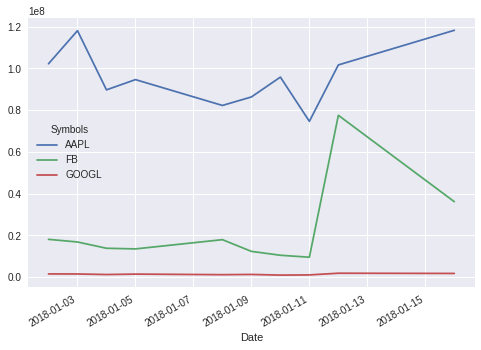

In [842]:
# visualisasi
stock_volume.plot()

📈 Insight:

- Volume tertingi pada FB ada pada tanggal 2018-01-13
- Volume terendah pada AAPL ada pada tanggal 2018-01-11
- Google volatilitas nya stabil
- Volume pada APPL cukup fluktuatif
- Nilai volume FB pada tanggal 11 Jan 2018 mengalami kenaikan yang cukup signifikan, namun setelah mengalami penurunan kembali
- Volume AAPL lebih besar dibandingkan kedua saham lainnya
- 

🔻 Cukup mudah bukan? Method `plot()` sudah mempermudah kita dalam melakukan visualisasi langsung pada DataFrame, tanpa perlu mengerti cara penggunaan `matplotlib`. Kunjungi [dokumentasi matplotlib](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py) untuk detail mengenai `matplotlib`.

🔻 Namun, keterbatasan dari penggunaan `plot()` adalah minim kustomisasi dari visualisasi yang ada. Hanya terbatas pada parameter yang ada di dalam method tersebut. Kunjungi [dokumentasi method plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html).

🔻 Salah satu kustomisasi yang dapat kita lakukan untuk memperindah visualisasi adalah melalui [matplotlib style sheet](https://matplotlib.org/tutorials/introductory/customizing.html). Kita dapat mengganti nilai 'default' pada method `plt.style.use()` dengan salah satu style yang tersedia, kemudian jalankan kembali code visualisasi untuk menerapkan style yang dipilih.

💡 **Tips:** Meskipun kode kita tidak menggunakan `matplotlib` secara eksplisit namun bergantung pada implementasi `pandas`, alangkah lebih baik kita tetap melakukan import untuk berinteraksi dengan plot: `import matplotlib.pyplot as plt`.

In [843]:
import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use('seaborn')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


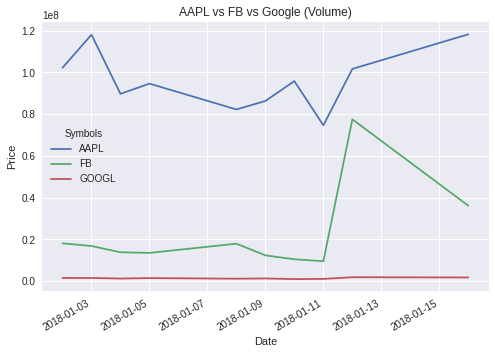

In [844]:
a = stock['Volume'].head(n=10).plot(title='AAPL vs FB vs Google (Volume)', ylabel='Price')

📈 Insight:

- GOOGL untuk volumenya stagnan atau stabil
- AAPL nilai volumenya cukup fluktuatif
- Nilai Volume FB pada tanggal 11 Jan 2018 mengalami kenaikan yang cukup signifikan, namun pada tanggal 12 Jan 2018 mengalami penurunan kembali
- Volume AAPL paling besar dibandingkan kedua saham yang lainnya


❓ Sekarang kita coba visualisasi dari object `aapl` berikut:

In [845]:
march = pd.date_range(start="2018-03-01", end="2019-03-31")
aapl = stock.xs('AAPL', level='Symbols', axis=1)
aapl = aapl.reindex(march)
aapl

Attributes,Adj Close,Close,High,Low,Open,Volume
2018-03-01,42.013908,43.750000,44.945000,43.165001,44.634998,195208000.000000
2018-03-02,42.304405,44.052502,44.075001,43.112499,43.200001,153816000.000000
2018-03-03,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-04,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-05,42.450863,44.205002,44.435001,43.630001,43.802502,113605600.000000
...,...,...,...,...,...,...
2019-03-27,45.936775,47.117500,47.439999,46.637501,47.187500,119393600.000000
2019-03-28,45.997707,47.180000,47.389999,46.882500,47.237499,83121600.000000
2019-03-29,46.297516,47.487499,47.520000,47.134998,47.457500,94256000.000000
2019-03-30,NaN,NaN,NaN,NaN,NaN,NaN


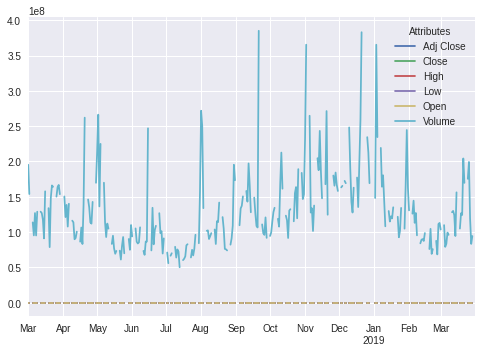

In [851]:
img = aapl.plot()

💭 **Diskusi:** Apakah visualisasi tersebut sudah cukup informatif dan tepat? Apabila belum, hal apa saja yang bisa di-improve dari visualisasi tersebut?

- [X] Plot Volume tidak dapat digabung dengan attribute lain, karena satuannya berbeda
- [X] Pastikan data tidak ada missing value agar garis tidak terputus-putus
- [X] Menambahkan informasi judul (title), label vertikalnya (xlabel, ylabel)


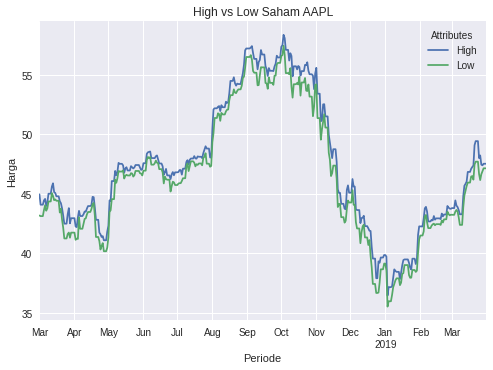

In [849]:
# Attribute: High dan Low
# visualisasi
aapl_high_low = aapl[['High', 'Low']].fillna(method='ffill')
img = aapl_high_low.plot(title='High vs Low Saham AAPL',
                        xlabel='Periode',
                        ylabel='Harga')

Opsional: anatomi plot pada matplotlib https://matplotlib.org/stable/gallery/showcase/anatomy.html

## 📌 Types of Visualization

Secara default, `plot()` menampilkan visualisasi **line chart**. Ada beberapa tipe visualisasi lain yang dapat kita buat menggunakan `.plot`:

Visualisasi berikut hanya perlu menggunakan **satu** kolom:

- Data kategorik:
    - **`.plot.bar()` atau `.plot.barh()` untuk barplot (diagram batang)**
    - **`.plot.box()` atau `.boxplot()` untuk boxplot (berhubungan dengan five number summary)**
    - `.plot.pie()` untuk pie chart
    

- Data numerik:
    - **`.plot.hist()` untuk histogram**
    - `.plot.kde()` atau `.plot.density()` untuk density plot
    - `.plot.area()` untuk area plot

Visualisasi berikut perlu menggunakan **dua** kolom:

- Numerik vs numerik:
    - `.plot.scatter()` untuk scatter plot
    - `.plot.hexbin()` untuk hexagonal bin plot

💡 Panduan untuk menentukan tipe visualisasi yang tepat: https://www.data-to-viz.com/

**Silahkan mengacu referensi lengkapnya di [official documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) untuk method `plot` apabila ingin eksplor visualisasi yang ada di luar lingkup course ini**

### 📊 Bar plot

❓ Menggunakan data `stock`, tampilkan visualisasi untuk **membandingkan** fluktuasi nilai `Open` pada masing-masing `Symbols`.

<AxesSubplot:xlabel='Symbols'>

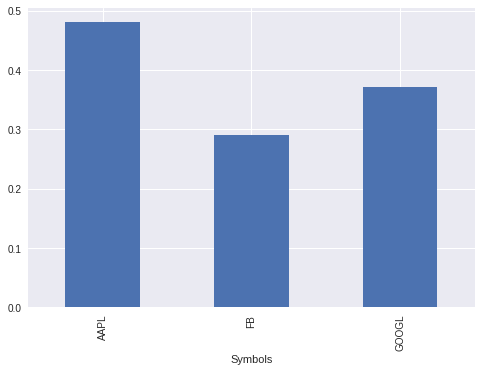

In [858]:
cov = stock['Open'].std()/stock['Open'].mean()
cov.plot(kind='bar')

📈 Insight:

- AAPL adalah saham dengan fluktuasi nilai Open tertinggi.
- FB adalah saham dengan fluktuasi nilai Open paling stabil dibanding yang lain.

❓ Gunakan parameter `kind='barh'` untuk menampilkan bar chart secara horizontal (mendatar)

<AxesSubplot:title={'center':'Perbandingan fluktuasi nilai Open Pada Masing-Masing Saham'}, ylabel='Symbols'>

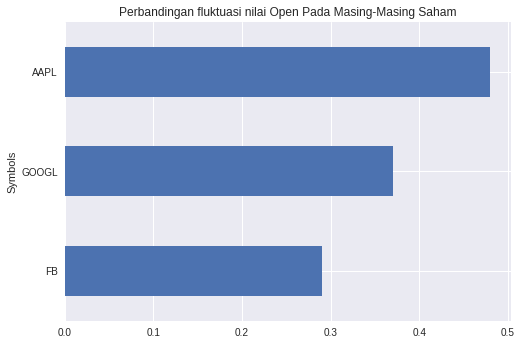

In [860]:
# code here
cov.sort_values().plot(kind='barh', title='Perbandingan fluktuasi nilai Open Pada Masing-Masing Saham')

## 📌 Types of Visualization

Secara default, `plot()` menampilkan visualisasi **line chart**. Ada beberapa tipe visualisasi lain yang dapat kita buat menggunakan `.plot`:

Visualisasi berikut hanya perlu menggunakan **satu** kolom:

- Data kategorik:
    - **`.plot.bar()` atau `.plot.barh()` untuk barplot (diagram batang)**
    - **`.plot.box()` atau `.boxplot()` untuk boxplot (berhubungan dengan five number summary)**
    - `.plot.pie()` untuk pie chart
    

- Data numerik:
    - **`.plot.hist()` untuk histogram**
    - `.plot.kde()` atau `.plot.density()` untuk density plot
    - `.plot.area()` untuk area plot

Visualisasi berikut perlu menggunakan **dua** kolom:

- Numerik vs numerik:
    - `.plot.scatter()` untuk scatter plot
    - `.plot.hexbin()` untuk hexagonal bin plot

💡 Panduan untuk menentukan tipe visualisasi yang tepat: https://www.data-to-viz.com/

**Silahkan mengacu referensi lengkapnya di [official documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) untuk method `plot` apabila ingin eksplor visualisasi yang ada di luar lingkup course ini**

**END OF DAY 2**

---

**START OF DAY 3**

### Histogram

Menggunakan data `stock`, tampilkan visualisasi histogram untuk mengetahui **persebaran** `Volume` pada saham `GOOGL`:

In [861]:
# menyiapkan data
stock_volume_google = stock.xs(key='GOOGL', level=1, axis=1)['Volume']

Date
2018-01-02    1588300
2018-01-03    1565900
2018-01-04    1302600
2018-01-05    1512500
2018-01-08    1232200
               ...   
2021-12-21    1437800
2021-12-22    1316100
2021-12-23    1318500
2021-12-27     798800
2021-12-28     910000
Name: Volume, Length: 1005, dtype: int64

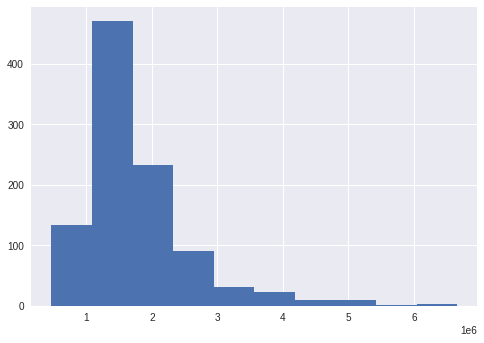

In [864]:
# visualisasi
img = stock_volume_google.hist()

📈 Insight: 

- Nilai volume pada rentang 1 - 2 jt yang frekuensinya paling tinggi --> volume perdagangan saham google sering kali terjadi pada angka 1-2 juta lembar saham per harinya.

- Ketika volume diatas 6 juta adalah kejadian yang sangat tidak biasa. 

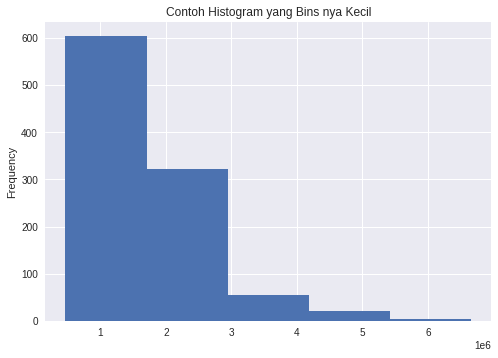

In [867]:
img = stock_volume_google.plot.hist(bins=5, title='Contoh Histogram yang Bins nya Kecil')

### 💭 Knowledge Check: Bar plot vs Histogram

Setelah membuat kedua plot di atas, apa perbedaan antara bar plot dengan histogram?

- Barplot digunakan untuk perbandingan data kategorikal
- Histogram digunakan untuk persebaran data numerik
- Barplot digunakan untuk tipe data kategori, sedangkan histogram untuk data numerik
- tampilan barplot yang ada jarak, histogram batangnya dempetan.

Histogram untuk numerik yang kontinu, sehingga kita terkadang buatnya dalam bentuk rentang (bins)

### Box plot

❓ Menggunakan data `stock`, tampilkan visualisasi box plot untuk membandingkan **persebaran** `Volume` untuk ketiga saham.

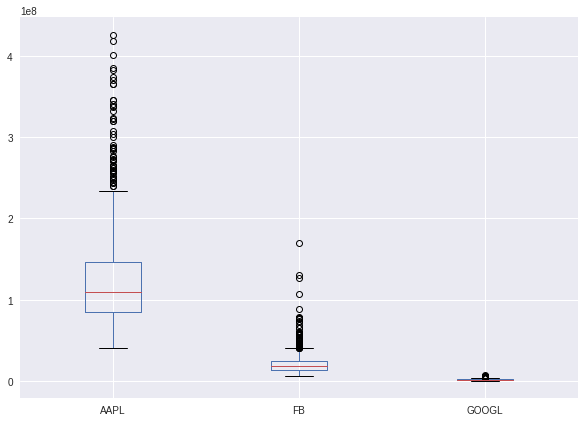

In [872]:
img = stock['Volume'].boxplot(figsize=(10, 7))

Box plot menggambarkan **five number summary** sebagai berikut: 

<img src="../assets/boxplot.png" width="600"/>

- Q1: kuartil 1 (data ke 25%)
- Median: kuartil 2 (data ke 50%)
- Q3: kuartil 3 (data ke 75%)
- Lower whisker: pagar bawah
- Upper whisker: pagar atas
- Data di luar pagar akan dianggap sebagai outlier atau data pencilan

⚠️ Lower whisker bukan nilai minimum data. Upper whisker juga buka nilai maksimum data

In [873]:
# informasi mengenai quartile 1, 2, dan 3
stock.describe()['Volume']['AAPL']

count        1005.000000
mean    124277421.293532
std      58169196.697047
min      41000000.000000
25%      84632400.000000
50%     109560400.000000
75%     146322800.000000
max     426510000.000000
Name: AAPL, dtype: float64

Gunakan parameter `vert=False` untuk melihat boxplot secara horizontal:

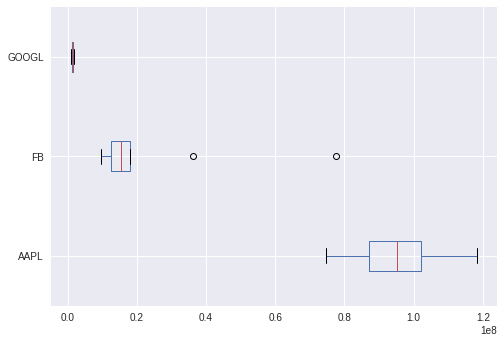

In [874]:
img = stock_volume.boxplot(vert=False)

📌 Catatan: visualisasi boxplot di atas kurang tepat, karena dalam dunia saham kita tidak boleh langsung membandingkan nilai volumenya secara absolute, melainkan biasanya kita melihatnya secara relatif / persentasenya tergantung lembar saham yang dijual.

❓ **Kasus**: Tampilkan **persebaran** Volume GOOGL untuk masing-masing periode `quarter`nya:

- Memindahkan index `Date` menjadi kolom
- Mengekstrak periode kuarter dari `Date` menggunakan `.dt.to_period()`, simpan ke kolom `quarter`

In [875]:
# mempersiapkan data
stock_volume_google = stock_volume_google.reset_index()

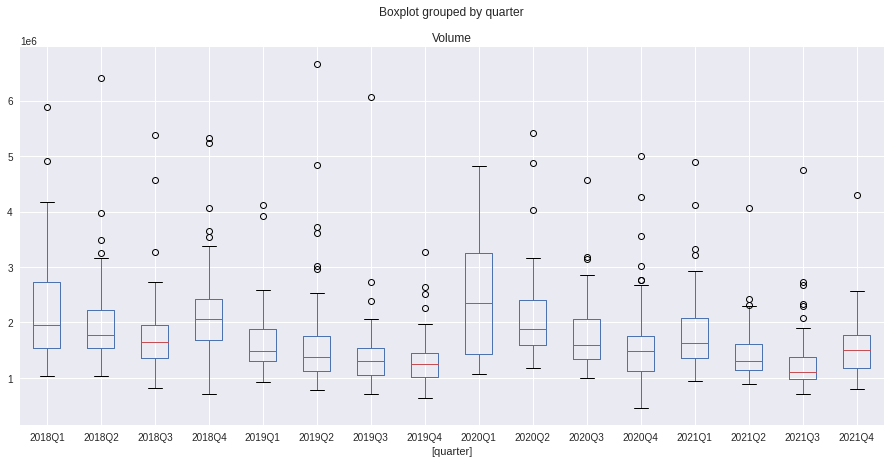

In [876]:
stock_volume_google['quarter'] = stock_volume_google['Date'].dt.to_period('Q')
img = stock_volume_google.boxplot(by='quarter', figsize=(15, 7), vert=False)

Alternatif `.plot(kind='box')`: Method `.boxplot()` akan mempermudah Anda ketika ingin membuat boxplot namun dikelompokkan berdasarkan kolom tertentu

<AxesSubplot:>

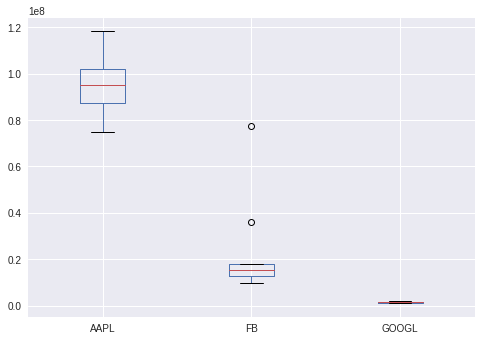

In [408]:
# visualisasi
stock_volume.boxplot()

📈 Insight:

- Dari median: ...
- Dari lebar kotak: ...
- Dari outlier: ...

## (Additional) Other Python Libraries for Visualization

Apabila Anda tertarik mengenai visualisasi di Python, silahkan eksplorasi lebih lanjut package-package berikut:

- `matplotlib`: semua elemen pada visualisasi dapat dikustomisasi, namun membutuhkan code yang lebih panjang. [Dokumentasi Matplotlib](https://matplotlib.org/3.2.2/tutorials/index.html) 
- `seaborn`: dikembangkan dari `matplotlib`, lebih sedikit yang dapat dikustomisasi namun lebih mudah. [Dokumentasi Seaborn](https://seaborn.pydata.org/introduction.html)
- `plotly`: plot interaktif serta kompatibilitas dengan bahasa lain yang tinggi. [Dokumentasi Plotly](https://plotly.com/python/)
- `altair`: plot interaktif yang bersifat deklaratif, code relatif lebih mudah. [Dokumentasi Altair](https://altair-viz.github.io/index.html)

Referensi perbandingan library: https://askalgo-py.netlify.app/docs/dwv#adakah-library-visualisasi-data-di-python-selain-matplotlib

# Group By: Aggregation Table

Teknik yang tak kalah penting adalah operasi **group by**. Mungkin untuk Anda yang sudah pernah menggunakan SQL atau tools lain seperti `tidyverse` pada bahasa R akan familiar dengan operasi group by ini.

❗️ Misalkan kita punya dataframe `close_melted` yang ingin kita bandingkan nilai `Close` hariannya pada saham AAPL, FB, dan GOOGL:

In [186]:
close = stock.xs('Close', level='Attributes', axis=1)
close_melted = close.reset_index().melt(id_vars='Date', value_name='Close')
close_melted

,Date,Symbols,Close
0,2018-01-02,AAPL,43.064999
1,2018-01-03,AAPL,43.057499
2,2018-01-04,AAPL,43.257500
3,2018-01-05,AAPL,43.750000
4,2018-01-08,AAPL,43.587502
...,...,...,...
3010,2021-12-21,GOOGL,2869.449951
3011,2021-12-22,GOOGL,2928.300049
3012,2021-12-23,GOOGL,2938.330078
3013,2021-12-27,GOOGL,2958.129883


❓ **Pertanyaan**: Di antara AAPL, FB, GOOGL, manakah saham yang memiliki **rata-rata** `Close` harian tertinggi?

Pertama, coba buatlah tabel agregasi dengan `crosstab()` dan juga `pivot_table()`:

In [187]:
# versi crosstab


In [188]:
# versi pivot_table: 


**Ingat kembali:** 

Persamaan antara `crosstab` dan `pivot_table` yaitu keduanya dapat digunakan untuk menghasilkan tabel agregasi yang memiliki parameter `index`, `columns`, `values`, and `aggfunc`.

Perbedaan antara `crosstab` dan `pivot_table` dapat dirangkum dalam tabel berikut:

|                                                                                    | `pd.crosstab()` | `pd.pivot_table()` |
|------------------------------------------------------------------------------------|-----------------|--------------------|
|                                                                          **Input** | Array of values/Series |          DataFrame (parameter `data`)|
|                                                              **Default `aggfunc`** |       `'count'` |           `'mean'` |
|                                                          **Parameter `columns`** |       Mandatory |      Optional |
|                                                          **Parameter `normalize`** |       Available |      Not Available |
| [**Computation Time**](https://ramiro.org/notebook/pandas-crosstab-groupby-pivot/) | Relatively Slower |  Relatively Faster |

Bandingkan dengan method `groupby()`:

In [189]:
# versi groupby


In [190]:
# mengurutkan tabel hasil groupby berdasarkan nilai Close


Istilah **group by** merupakan gabungan dari proses:

1. Split: mengelompokkan baris, co: dikelompokkan berdasarkan `Symbols`
2. Apply: menerapkan fungsi untuk masing-masing kelompok, co: dihitung mean untuk masing-masing `Symbols`
3. Combine: mengembalikan hasil dalam bentuk 1 tabel

Ilustrasi proses **split-apply-combine** dapat dilihat pada [Google Sheet](https://docs.google.com/spreadsheets/d/1i58D8cXXGfKVs_2yBzXp4vD1Dku2p6HvDaCJBLB_-rg/edit#gid=0)

## Visualizing Barchart for Comparison

Sampai di sini kita tahu bahwa GOOGL memiliki rata-rata `Close` transaksi harian tertinggi dari visualisasi bar plot yang dihasilkan pada bagian sebelumnya. Untuk selanjutnya, mari kita menganalisa `Close` dari saham GOOGL. Kita bisa menggunakan method `day_name()` untuk mengekstrak nama hari dari `Date`:

In [191]:
googl = stock.xs('GOOGL', level='Symbols', axis=1).copy()
googl['Close_Diff'] = googl['Close'].diff()
googl['Weekday'] = googl.index.day_name()
googl

Attributes,Adj Close,Close,High,Low,Open,Volume,Close_Diff,Weekday
Date,,,,,,,,
2018-01-02,1073.209961,1073.209961,1075.979980,1053.020020,1053.020020,1588300,NaN,Tuesday
2018-01-03,1091.520020,1091.520020,1096.099976,1073.430054,1073.930054,1565900,18.310059,Wednesday
2018-01-04,1095.760010,1095.760010,1104.079956,1094.260010,1097.089966,1302600,4.239990,Thursday
2018-01-05,1110.290039,1110.290039,1113.579956,1101.800049,1103.449951,1512500,14.530029,Friday
2018-01-08,1114.209961,1114.209961,1119.160034,1110.000000,1111.000000,1232200,3.919922,Monday
...,...,...,...,...,...,...,...,...
2021-12-21,2869.449951,2869.449951,2877.379883,2810.050049,2841.070068,1437800,37.310059,Tuesday
2021-12-22,2928.300049,2928.300049,2930.000000,2861.350098,2861.350098,1316100,58.850098,Wednesday
2021-12-23,2938.330078,2938.330078,2964.870117,2929.040039,2930.000000,1318500,10.030029,Thursday


Perhatikan kolom `Close_Diff` yang dibuat di atas, nilai ini merupakan perbedaan antara nilai `Close` pada hari tertentu dengan hari berikutnya.

❓ **Kasus:** Misalkan kita ingin membandingkan `Close_Diff` di setiap hari kerja. Untuk saham GOOGL, apakah secara rata-rata pada hari Kamis (Thursday) mencatat perbedaan yang lebih tinggi dibandingkan dengan hari Jumat (Friday)?

In [192]:
# mempersiapkan data: gunakan groupby


In [193]:
# visualisasi


❓ **Diskusi:** Apakah plot di atas sudah cukup efektif? Kalau belum, apa yang perlu diperbaiki dari plot di atas?

<!--
googl_close_diff = googl.groupby('Weekday').mean()['Close_Diff']
googl_close_diff.index

wday = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
googl_close_diff.index = pd.CategoricalIndex(
    data = googl_close_diff.index,
    categories = wday,
    ordered = True)
googl_close_diff.index
-->

- mengurutkan berdasarkan nilai: `.sort_values()`
- mengurutkan berdasarkan index: `.sort_index()`

In [194]:
# visualisasi


📈 Insight: ...

Alternatif barplot horizontal:

📌 Note: preferensi pengurutan index: dari **kiri ke kanan** atau **atas ke bawah**

In [195]:
# alternatif 1 untuk mengubah urutan weekday pada horizontal barplot
googl_close_diff.sort_index(ascending=False).plot(kind='barh');

NameError: name 'googl_close_diff' is not defined

---
### 📝 Summary Day 3

**Types of Visualization (cont.)**

- Histogram: ...
    - `.plot(kind='hist')` atau `.plot.hist()`
- Boxplot: ...
    - `.plot(kind='box')` atau `.plot.box()` atau `.boxplot()`
    - Insight:
        - ...
        - ...
        - ...
        
- Istilah group by merupakan gabungan dari proses:
    - Mengelompokkan baris berdasarkan kolom tertentu: split
    - Menerapkan fungsi untuk masing-masing kelompok: apply
    - Mengembalikan hasil dalam bentuk 1 tabel: combine

- Syntax:

```
    df.groupby([COLUMNS_TO_GROUP])[[VALUES]].AGGFUNC()
    df.groupby([COLUMNS_TO_GROUP]).AGGFUNC()[[VALUES]]
```

- `COLUMNS_TO_GROUP` mengacu pada kolom yang ingin dikelompokkan, seperti parameter `index` atau `columns` pada `crosstab`/`pivot_table`
- `VALUES` mengacu pada kolom yang ingin di-agregasi, seperti parameter `values` pada `crosstab`/`pivot_table`
- `AGGFUNC` mengacu pada fungsi agregat yang ingin diterapkan pada `VALUES`, seperti parameter `aggfunc` pada `crosstab`/`pivot_table`. Dapat berupa method `.agg()` untuk menspesifikan fungsi agregat untuk masing-masing kolom.

---

**END OF DAY 3**

---

**START OF DAY 4**

## Using Grouped Barchart

💭 Masih ingat dengan dataframe `closingprice`? Kita akan coba memvisualisasikan **grouped barchart** untuk membandingkan nilai `Close` untuk ketiga saham **setiap bulannya** pada kuartal pertama tahun 2019.

- Pertama, kita memastikan `closingprice` tidak memiliki missing values dengan melakukan imputasi forward dan backward fill.
- Selanjutnya, gunakan objek `closingprice` untuk menampilkan nilai **rata-rata** `Close` untuk setiap bulannya. Simpan tabel agregasi ke objek `average_closing`.

📌 Note: untuk mengambil nama bulan tidak perlu `.dt` lagi, karena sudah berupa objek DatetimeIndex.

In [ ]:
# mempersiapkan data
closingprice = closingprice.ffill().bfill()
closingprice['Month'] = closingprice.index.month_name()
average_closing = closingprice.groupby('Month').mean()
average_closing

Visualisasi:

- Index menjadi sumbu horizontal
- Column menjadi grouping untuk bar chartnya

In [ ]:
# visualisasi


❓ **Diskusi:** Apakah plot di atas sudah cukup efektif? Kalau belum, apa yang perlu diperbaiki dari plot di atas?

<!--
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
average_closing.index = pd.CategoricalIndex(
    data=...,
    categories=...,
    ordered=...)
-->

In [ ]:
# improvement visualisasi


📈 Insight: ...

## 💭 Knowledge Check: Group By + Reshaping

Misal Anda dihadapkan dengan long DataFrame seperti pada `closingprice_melt` berikut:

In [ ]:
closingprice_melt = closingprice.melt(id_vars='Month', value_name='Close')
closingprice_melt

❓ Kira-kira bagaimana cara kita mengubah bentuk `closingprice_melt` menjadi `average_closing`?

**Hint:** Gunakan teknik `groupby` dan juga reshaping

In [ ]:
# your code here


In [ ]:
# reshape agar bentuknya sama seperti average_closing


Ilustrasi group by pada kasus di atas dapat dilihat pada [Google Sheet](https://docs.google.com/spreadsheets/d/1i58D8cXXGfKVs_2yBzXp4vD1Dku2p6HvDaCJBLB_-rg/edit?usp=sharing)

## Combining `agg` and `groupby`

❗️ Perhatikan group by operation di bawah ini yang di-chaining dengan aggregate method `mean()`:

In [ ]:
stock_long = stock.stack().reset_index()
stock_long.head()

In [ ]:
# aggregasi biasa
stock_long.groupby('Symbols').mean()

Misalkan kita ingin membuat tabel agregasi dengan `aggfunc` yang berbeda-beda untuk masing-masing `Symbols` berupa:
- Maximum `stock` price (`max` dari `High`)
- Minimum `stock` price (`min` dari `Low`)
- Rata-rata closing price (`mean` dari `Close`)

Untuk mendapat hasil tersebut, kita harus melakukan chaining `groupby` dengan method `agg`. Kita harus menyertakan mapping (**dictionary**) untuk setiap kolom dengan fungsi agregasinya seperti berikut ini:

Syntax:

```
.agg({
    'NAMA_KOLOM': 'FUNGSI_AGREGASI'
})
```

In [ ]:
# contoh penggunaan method agg untuk menerapkan fungsi std pada 1 kolom, yaitu Close


In [ ]:
# contoh penggunaan untuk fungsi yang berbeda pada setiap kolonya
stock_summary = 


❓ Visualisasikan tabel agregasi di atas untuk membandingkan nilai tersebut:

In [ ]:
# visualisasi


📈 Insight:

...

## 💭 Knowledge Check: Vizualization

Perhatikan dataframe `monthly_closing` berikut:

In [ ]:
stock['YearMonth'] = stock.index.to_period('M')
monthly_closing = stock.groupby('YearMonth').mean()['Close']
monthly_closing.head()

Tipe plot mana yang paling sesuai untuk data di atas, apabila kita ingin melihat pergerakan nilai `Close` dari waktu ke waktu?

- [ ] Line plot `.plot()`
- [ ] Scatter plot `.plot.scatter(x, y)`
- [ ] Bar plot `.plot.bar()`
- [ ] Box plot `.plot.box()`

In [ ]:
# your code here
# line plot
monthly_closing.plot()

In [ ]:
# bar plot
monthly_closing.plot(kind='bar')

In [ ]:
# box plot
monthly_closing.plot(kind='box')

In [ ]:
monthly_closing.head()

In [ ]:
monthly_closing.plot.scatter(x='AAPL', y='FB')